#### <font color="#03997A"> Diplomado en Ciencia de datos UNAM </font>

##### <font color="#03997A"> Dr: Alejandro Pimentel </font>

##### <font color="#03997A"> Modulo 6 Aprendizaje de Maquina supervisado </font>

##### <font color="#03997A"> Tema 12 Arbol de Clasificación Alumno: Ibarra Ramírez Sergio </font>

Importemos la libreria necesaria de DecisionTreeClassifier

In [1]:
from sklearn.tree import DecisionTreeClassifier

Vamos a importar y usar la libreria iris 

In [2]:
from sklearn.datasets import load_iris

In [3]:
tabla = load_iris(as_frame=True)
tabla.frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Dividimos en datos de train y test 

In [4]:
y = tabla.frame["target"]
X = tabla.frame.drop(["target"],axis=1)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 2022)
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
38,4.4,3.0,1.3,0.2
82,5.8,2.7,3.9,1.2
89,5.5,2.5,4.0,1.3
1,4.9,3.0,1.4,0.2
74,6.4,2.9,4.3,1.3
...,...,...,...,...
24,4.8,3.4,1.9,0.2
18,5.7,3.8,1.7,0.3
88,5.6,3.0,4.1,1.3
112,6.8,3.0,5.5,2.1


Definimos como tal el arbol de clasificacion

In [11]:
arbol_clasificacion = DecisionTreeClassifier(max_depth=5)
arbol_clasificacion


DecisionTreeClassifier(max_depth=5)

Hacemos el entrenamiento y predición con el modelo 

In [12]:
arbol_clasificacion.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [13]:
y_pred_arbol_clasificavion = arbol_clasificacion.predict(X_test)
y_pred_arbol_clasificavion

array([2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 1, 0, 0,
       2, 0, 2, 1, 2, 0, 1, 2])

Vamos a generar el reporte de métricas de la clasificación 

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_arbol_clasificavion))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.89      1.00      0.94         8
           2       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



De igual manera se puede plotear el DecisionTreeClassifier(max_depth=)

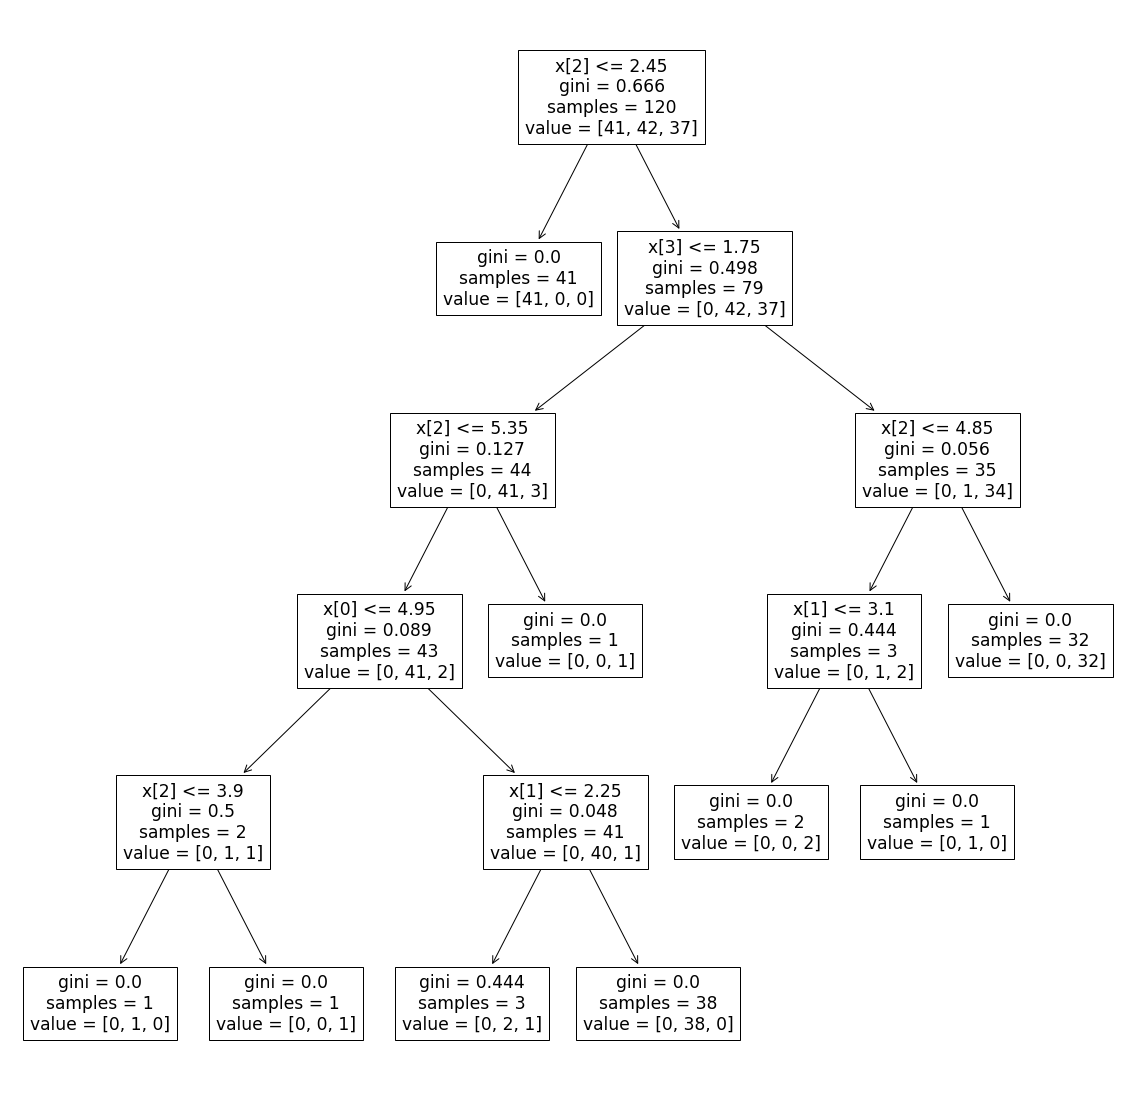

In [15]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,20))
tree.plot_tree(arbol_clasificacion)
plt.show()

Vamos a gráficar como tal la división o clasificación 

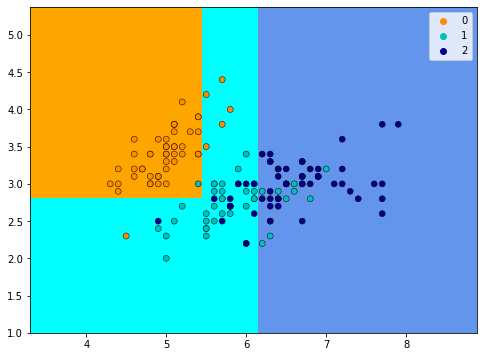

In [18]:
import seaborn as sns
from sklearn import datasets, neighbors
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

iris = datasets.load_iris()
X,y = load_iris(return_X_y=True)

X = X[:, :2] # Solo las dos primeras dimensiones, no se pueden visualizar más

h = 0.02

# Definicion de colores
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]


modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(X, y)

# Bordes y áreas
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Puntos
sns.scatterplot(
    x=X[:, 0],
    y=X[:, 1],
    hue=y,
    palette=cmap_bold,
    alpha=1.0,
    edgecolor="black",
)

plt.show()

Observemos la diferencia entre un corte provocado o hehco mediante el modelo KNN-Classifier, vs el que general el árbol de decisición